# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

# [作業目標]
- 仿造範例的資料操作, 試著進行指定的離群值處理

# [作業重點]
- 計算 AMT_ANNUITY 的分位點 (q0 - q100) (Hint : np.percentile, In[3])
- 將 AMT_ANNUITY 的 NaN 用中位數取代 (Hint : q50, In[4])
- 將 AMT_ANNUITY 數值轉換到 -1 ~ 1 之間 (Hint : 參考範例, In[5])
- 將 AMT_GOOD_PRICE 的 NaN 用眾數取代 (In[6])

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

缺值個數 : 12
min 最小值 : 1615.5
max 最大值 : 258025.5


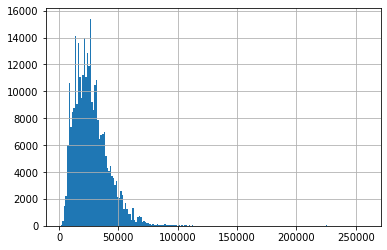

In [23]:
f_app = os.path.join(dir_data, 'application_train.csv')
#print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
#app_train.head()

print("缺值個數 : "+str(app_train['AMT_ANNUITY'].shape[0] - app_train['AMT_ANNUITY'].count()))
print("min 最小值 : "+str(app_train['AMT_ANNUITY'].min()))
print("max 最大值 : "+str(app_train['AMT_ANNUITY'].max()))

app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].hist(bins = 200)
plt.show()


## 1. 列出 AMT_ANNUITY 的 q0 - q100
## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
## 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補


In [44]:
# 1: 計算 AMT_ANNUITY 的 q0 - q100
q_all = []
a = []
for i in range(0, 100):
    q__num = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i)
    q_all.append(q__num)
    a.append(i)
#print(q_all)
#pd.DataFrame({'q': list(range(101)),'value': q_all})

data = pd.DataFrame(zip(a, q_all), columns=['position', 'value'])
print(data)

    position     value
0          0   1615.50
1          1   6182.91
2          2   6750.00
3          3   7875.00
4          4   8703.00
..       ...       ...
95        95  53325.00
96        96  55624.50
97        97  58482.00
98        98  62964.00
99        99  70006.50

[100 rows x 2 columns]


In [48]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

q_50 = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 50)

app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50

print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

In [60]:
# 2.2 Normalize values to -1 to 1
print("#=============== Original data range ===============#\r\n")
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    
    x = 2*(( x - min(x) ) / ( max(x) - min(x) )-0.5)
    
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("\r\n#============== Normalized data range ==============#")
app_train['AMT_ANNUITY_NORMALIZED'].describe()

#=============== Original data range ===============#

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

#============== Normalized data range ==============#


count    307511.000000
mean         -0.801154
std           0.113049
min          -1.000000
25%          -0.883714
50%          -0.818357
75%          -0.742752
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

In [50]:
# 3
from scipy.stats import mode
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

# 列出重複最多的數值
value_most = mode(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE'])
print(value_most)

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278
ModeResult(mode=array([450000.]), count=array([26022]))
After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0
